In [34]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor 
from scipy import stats
import numpy as np
import pandas as pd

import math
import os
import pickle

In [35]:
def rmse(y1, y2):
    ss = 0
    for x1, x2 in zip(y1, y2):
        x1 = float(x1)
        x2 = float(x2)
        ss += pow((x1 - x2), 2)
        
    m = ss / len(y1)
    return math.sqrt(m)

In [36]:
#Import data from data source 
data_fitbit ="dailyActivity.csv"
data_sleeping = "sleepDay_merged.csv"

fitbit_analysis = pd.read_csv(data_fitbit)
sleep_data =pd.read_csv(data_sleeping)
#sleep_data.head()
# Combine the data into a single dataset
to_model_data = pd.merge(fitbit_analysis,sleep_data, on=["Id", 'ActivityDate'], how='outer')
to_model_data.head()


#to_model_data = fitbit_analysis.join(sleep_data, on=['Id', 'ActivityDate'])
#to_model_data = sleep_data.join( fitbit_analysis, on=['Id', 'ActivityDate'])

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTimeinBed,TotalMinutesAssleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,NaN,NaN,NaN,NaN,NaN
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,NaN,NaN,NaN,NaN,NaN
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,NaN,NaN,NaN,NaN,NaN
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,NaN,NaN,NaN,NaN,NaN
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,NaN,NaN,NaN,NaN,NaN


In [37]:
len(to_model_data)

1400

In [38]:
to_model_data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalTimeinBed', 'TotalMinutesAssleep', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [39]:
to_model_data.to_csv('test.csv', index='false')

In [40]:
data = to_model_data.drop(columns = ['TotalDistance', 'TotalTimeinBed', 'TotalMinutesAssleep', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'])

In [41]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [42]:
# X - features
# y - output - calories
X = data[['TotalSteps', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']]
y = data[['Calories']]

In [43]:
# Splitting into train and test sets
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
# Scale features
X_scaler = StandardScaler().fit(X_train_)

X_train = X_scaler.transform(X_train_)
X_test = X_scaler.transform(X_test_)

# Save scaler
with open('scale_GBR.param', 'wb') as f:
    pickle.dump(X_scaler, f)

/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [12]:
params = {'loss': ['ls', 'lad', 'huber'], 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 
          'n_estimators': [10, 50, 100, 500], 'min_samples_split': [2, 5, 7, 10], 
          'max_depth': [2, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']}

In [13]:
gbr = GradientBoostingRegressor(random_state=42)
model = GridSearchCV(gbr, params, cv=5, scoring='r2', verbose=10, n_jobs=-1)
model.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1922s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 290 tas

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['ls', 'lad', 'huber'], 'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'n_estimators': [10, 50, 100, 500], 'min_samples_split': [2, 5, 7, 10], 'max_depth': [2, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=10)

In [14]:
print('Best parameters found by grid search on the training set: ')
print(model.best_params_)
print()
print("Grid scores on training set:")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters found by grid search on the training set: 
{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 7, 'n_estimators': 500}

Grid scores on training set:
0.005 (+/-0.009) for {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
0.038 (+/-0.010) for {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 50}
0.077 (+/-0.013) for {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
0.284 (+/-0.042) for {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
0.005 (+/-0.009) for {'learning_rate': 0.001, 'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 10}
0.038 (+/-0.010) for {'learning_rate': 0.001, 'loss': 'ls', 'max_de

In [15]:
# Training a GBR model with the best parameters chosen from the GridSearchCV results
model_best = GradientBoostingRegressor(random_state=42, loss=model.best_params_['loss'], learning_rate=model.best_params_['learning_rate'],
                                      n_estimators=model.best_params_['n_estimators'], min_samples_split=model.best_params_['min_samples_split'],
                                      max_depth=model.best_params_['max_depth'], max_features=model.best_params_['max_features'])
model_best.fit(X_train, np.ravel(y_train))

# save model
with open('calorie_predictor_GBR.model', 'wb') as f:
    pickle.dump(model_best, f)

In [16]:
# Testing best model
y_train_pred = model_best.predict(X_train)
y_test_pred = model_best.predict(X_test)

# RMSE
train_rmse = rmse(y_train.values, y_train_pred)
print('Training Root Mean Square Error (RMSE): {}'.format(train_rmse))

# RMSE
test_rmse = rmse(y_test.values, y_test_pred)
print('Testing Root Mean Square Error (RMSE): {}'.format(test_rmse))

# R2
train_r2 = r2_score(y_train, y_train_pred)
print('Training R2 score: {}'.format(train_r2))

# R2
test_r2 = r2_score(y_test, y_test_pred)
print('Testing R2 score: {}'.format(test_r2))


Training Root Mean Square Error (RMSE): 211.66188137758098
Testing Root Mean Square Error (RMSE): 370.5609089746723
Training R2 score: 0.9238298370772501
Testing R2 score: 0.7189915684488977


/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


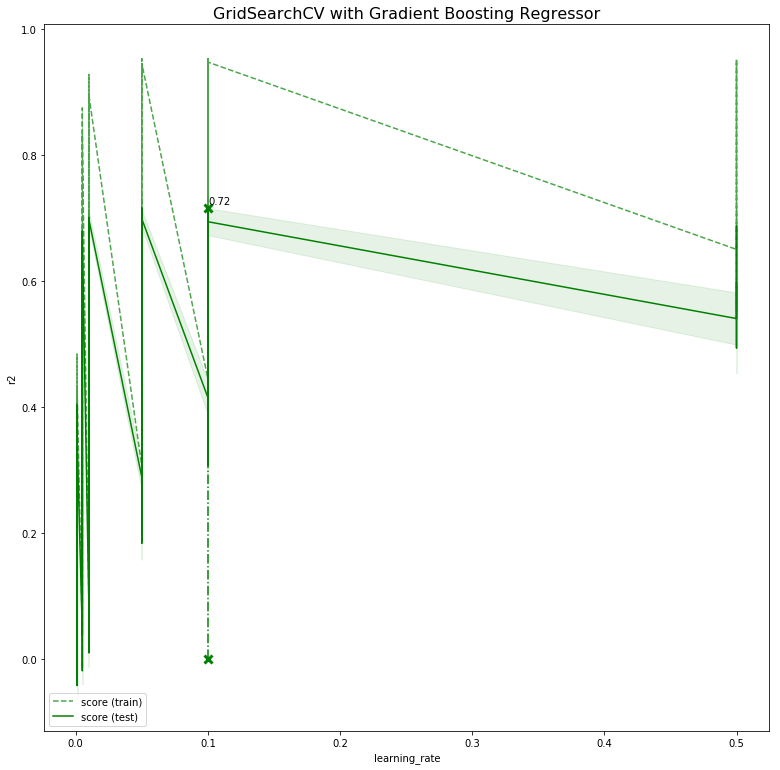

In [17]:
results = model.cv_results_
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV with Gradient Boosting Regressor", fontsize=16)
plt.xlabel("learning_rate")
plt.ylabel("r2")

ax = plt.gca()
#ax.set_ylim(-800,-550)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_learning_rate'].data, dtype=float)

color='g'
for sample, style in (('train', '--'), ('test', '-')):
    sample_score_mean = results['mean_%s_%s' % (sample, 'score')]
    sample_score_std = results['std_%s_%s' % (sample, 'score')]
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1 if sample == 'test' else 0, color=color)
    ax.plot(X_axis, sample_score_mean, style, color=color,
            alpha=1 if sample == 'test' else 0.7,
            label="%s (%s)" % ('score', sample))

best_index = np.nonzero(results['rank_test_%s' % 'score'] == 1)[0][0]
best_score = results['mean_test_%s' % 'score'][best_index]

# Plot a dotted vertical line at the best score for that scorer marked by x
ax.plot([X_axis[best_index], ] * 2, [0, best_score],
        linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

# Annotate the best score for that scorer
ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
#plt.show()
plt.savefig('gbr_learning-rate_vs_r2.png')


In [32]:
def predict_calories(model_name, scale_name, features):
    # model_name: name of the trained Gradient Boosted Regressor model, e.g.: 'calorie_predictor_GBR.model'
    # scale_name: name of file containing variable to scale features
    # features: 1 x 11 features as numpy array, e.g.: np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]) where the numbers are feature values
    
    # Loads the model saved in model_name. Runs the model using given feature vector. Returns the predicted calories.
    
    # loading model
    with open(model_name, 'rb') as f:
        calorie_model = pickle.load(f)
        
    # loading scaler
    with open(scale_name, 'rb') as f:
        X_scaler = pickle.load(f)

    assert np.shape(features)[0] == 11 # make sure number of features is correct
    
    features = features[np.newaxis, :]
    features = X_scaler.transform(features)
    

    return calorie_model.predict(features)

In [33]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

model_name = 'calorie_predictor_GBR.model'
scale_name = 'scale_GBR.param'
features = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

pred_calories = predict_calories(model_name, scale_name, features)
print('Predicted calories: {}'.format(pred_calories))

Predicted calories: [5790.82467683]


/anaconda2/envs/pytorchv1/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
